<a href="https://colab.research.google.com/github/Datriks/Python-for-Finance/blob/master/Copy_of_HSBC_identifying_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import nthe required libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('bmh')

In [0]:
# import the data from yahoo and change the column name
df = wb.DataReader('HSBC',data_source='yahoo',start='2011-1-1')
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'},inplace=True)
df.head()

,adj_close
Date,
2011-01-03,30.808836
2011-01-04,31.065376
2011-01-05,31.846931
2011-01-06,31.781305
2011-01-07,31.560564


In [0]:
# calculate simple returns and log retirns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2011-01-03,30.808836,NaN,NaN
2011-01-04,31.065376,0.008327,0.008292
2011-01-05,31.846931,0.025158,0.024847
2011-01-06,31.781305,-0.002061,-0.002063
2011-01-07,31.560564,-0.006946,-0.006970


In [0]:
df.dropna(axis=0,inplace=True)
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2011-01-04,31.065376,0.008327,0.008292
2011-01-05,31.846931,0.025158,0.024847
2011-01-06,31.781305,-0.002061,-0.002063
2011-01-07,31.560564,-0.006946,-0.006970
2011-01-10,31.298054,-0.008318,-0.008352


In [0]:
# calculate the rolling mean and standard deviation
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean','std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [0]:
# join the rolling metrics to the original data
df_outliers = df.join(df_rolling)

In [0]:
#define a function to identify outliers
def indentify_outliers(row, n_sigma=3):
  x = row['simple_rtn']
  mu = row['mean']
  sigma = row['std']

  if(x > mu +3 * sigma) | (x < 3 * sigma):
    return 1
  else:
    return 0 

In [0]:
# identify the outliers and extract their values for later use
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, 
                                           axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, 
                           ['simple_rtn']]

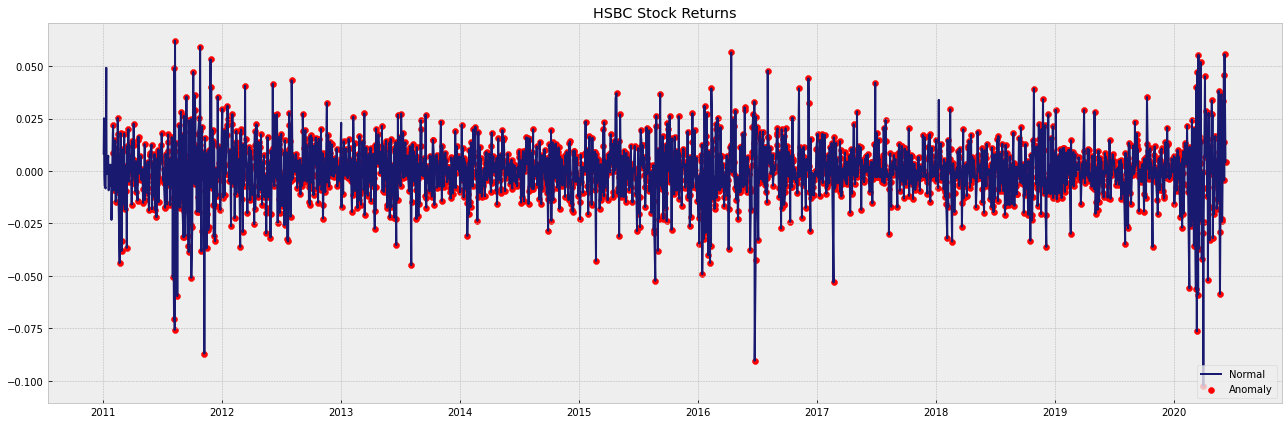

In [0]:
# plot the outliers
fig, ax = plt.subplots()

ax.plot(df_outliers.index,
        df_outliers.simple_rtn,
        color='midnightblue',
        label = 'Normal')

ax.scatter(outliers.index,
           outliers.simple_rtn,
           color = 'red',
           label = 'Anomaly')

ax.set_title('HSBC Stock Returns')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()